In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#Import package
import sys
import csv
import time
import numpy as np
from keras.utils import np_utils

C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lee\Anac

In [24]:
def readfile(path):
    print("Reading File...")
    x_train=[]    #image
    y_train=[]    #label
    
    raw_train=np.genfromtxt(path,delimiter=',',dtype=str,skip_header=1)
    for i in range(len(raw_train)):
        tmp=np.array(raw_train[i,1].split(' ')).reshape(1,48,48)
        x_train.append(tmp)
        x_train.append(np.flip(tmp,axis=2))   #增大训练数据量
        y_train.append(raw_train[i][0])
        y_train.append(raw_train[i][0])
    
    #convert to tulple
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    
    #normalization
    x_train4D=x_train.reshape(x_train.shape[0],1,48,48).astype('float32') 
    x_train4D_normalize=x_train4D/255    
    #One-Hot Encoding
    y_train_OneHot=np_utils.to_categorical(y_train)
   
    print("End...")
    return (x_train4D_normalize,y_train_OneHot)

In [25]:
path='train.csv'
(x_train,y_train)=readfile(path)

Reading File...
End...


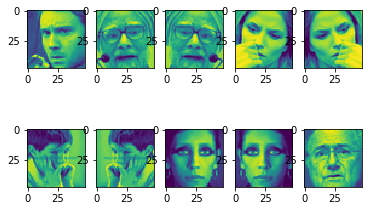

In [26]:
import matplotlib.pyplot as plt
plt.figure('training data')
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i][0])
plt.show()

In [5]:
#build model
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [6]:
model=Sequential()
# c1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(48,48,1),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
# c2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
# c3
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
print(model.summary())

W0903 20:25:14.377336 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 20:25:14.398279 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0903 20:25:14.401271 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 20:25:14.415207 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0903 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [7]:
#train
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_train,y_train,validation_split=0.2,epochs=50,batch_size=128,verbose=1)

W0903 20:25:32.539712 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0903 20:25:32.556666 16300 deprecation_wrapper.py:119] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0903 20:25:32.641441 16300 deprecation.py:323] From C:\Users\Lee\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45934 samples, validate on 11484 samples
Epoch 1/50
45934/45934 [==============================] - 16s 351us/step - loss: 1.7473 - acc: 0.2877 - val_loss: 1.5604 - val_acc: 0.3972
Epoch 2/50
45934/45934 [==============================] - 11s 246us/step - loss: 1.4461 - acc: 0.4417 - val_loss: 1.3243 - val_acc: 0.4995
Epoch 3/50
45934/45934 [==============================] - 11s 233us/step - loss: 1.2495 - acc: 0.5226 - val_loss: 1.2390 - val_acc: 0.5286
Epoch 4/50
45934/45934 [==============================] - 11s 236us/step - loss: 1.0929 - acc: 0.5861 - val_loss: 1.1784 - val_acc: 0.5552
Epoch 5/50
45934/45934 [==============================] - 11s 233us/step - loss: 0.9254 - acc: 0.6545 - val_loss: 1.2192 - val_acc: 0.5698
Epoch 6/50
45934/45934 [==============================] - 11s 239us/step - loss: 0.7530 - acc: 0.7216 - val_loss: 1.2921 - val_acc: 0.5566
Epoch 7/50
45934/45934 [==============================] - 11s 236us/step - loss: 0.5874 - acc: 0.7834 - val_loss: 1.